<a href="https://colab.research.google.com/github/cuonghip0908/AssignmentCNN/blob/master/bienbaogiaothong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.rc

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 501kB 10.9MB/s 
     |████████████████████████████████| 4.3MB 38.0MB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/AI_COLAB

/content/drive/My Drive/AI_COLAB


In [ ]:
link='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0fb9fbc8a3994e910483ac21bdf15d808de21a0ad1f14f984300bec2b472ca74
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
wget.download(link)

'traffic-signs-data (1).zip'

In [ ]:
data="./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_link=data+"train.p"
valid_link=data+"valid.p"
test_link=data+"test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link,mode='rb') as f:
  train=pickle.load(f)

In [ ]:
with open(valid_link,mode='rb')as f:
  valid=pickle.load(f)

In [ ]:
with open(test_link,mode='rb')as f:
  test=pickle.load(f)

In [ ]:
trainX=train['features']
trainY=train['labels']

In [ ]:
trainX.shape

(34799, 32, 32, 3)

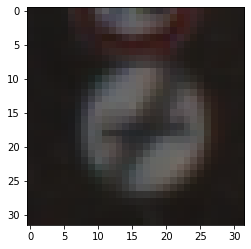

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])

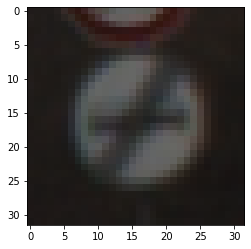

In [ ]:
plt.imshow(trainX[10])

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [ ]:
classNames[trainY[50]]

'End of no passing'

In [ ]:
#trao
from sklearn.utils import shuffle


In [ ]:
trainX,trainY=shuffle(trainX,trainY)

In [ ]:
validX=valid["features"]
validY=valid["labels"]

In [ ]:
testX=test["features"]
testY=test["labels"]

In [ ]:
trainX=trainX.astype('float')/255.0
validX=validX.astype('float')/255.0
testX=testX.astype('float')/255.0

In [ ]:
#chuan  hoa label
from sklearn.preprocessing import LabelBinarizer


In [ ]:
lb=LabelBinarizer()

In [ ]:
trainY=lb.fit_transform(trainY)

In [ ]:
validY=lb.fit_transform(validY)

In [ ]:
valid['labels'][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model=Sequential()

In [ ]:
width=32
height=32
classes=43
shape=(width,height,3)

In [ ]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

In [ ]:
aug=ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [ ]:
learning_rate=0.01

In [ ]:
epochs=10
#epoch
#step
batch_size=64

In [ ]:
opt=SGD(learning_rate=learning_rate,momentum=0.9)

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('start training')
H=model.fit_generator(aug.flow(trainX,trainY,batch_size=batch_size),validation_data=(validX,validY),steps_per_epoch=trainX.shape[0]//batch_size,epochs=epochs,verbose=1)

start training
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
543/543 [==============================] - 70s 128ms/step - loss: 1.9625 - accuracy: 0.4264 - val_loss: 1.8682 - val_accuracy: 0.4982
Epoch 2/10
543/543 [==============================] - 65s 119ms/step - loss: 0.7829 - accuracy: 0.7379 - val_loss: 1.2275 - val_accuracy: 0.6578
Epoch 3/10
543/543 [==============================] - 64s 118ms/step - loss: 0.3728 - accuracy: 0.8762 - val_loss: 0.9226 - val_accuracy: 0.7483
Epoch 4/10
543/543 [==============================] - 65s 121ms/step - loss: 0.2042 - accuracy: 0.9346 - val_loss: 0.7068 - val_accuracy: 0.8288
Epoch 5/10
543/543 [==============================] - 66s 122ms/step - loss: 0.1379 - accuracy: 0.9555 - val_loss: 0.5692 - val_accuracy: 0.8551
Epoch 6/10
543/543 [==============================] - 66s 121ms/step - loss: 0.1013 - accuracy: 0.9682 - val_loss: 0.6621 - val_accuracy: 0.8497
Epoch 7/10
543/543 [=

In [ ]:
model.save('bbgt.h5')

In [ ]:
result=model.predict(testX[80:81])

In [ ]:
result  

array([[8.4397920e-09, 4.2677085e-16, 1.0883019e-15, 1.4066988e-13,
        6.0510136e-14, 3.1274289e-13, 1.4909811e-11, 2.9003282e-08,
        4.2440551e-08, 4.8650538e-08, 2.4790982e-08, 8.8055236e-03,
        2.5742303e-10, 1.7359765e-11, 1.7628368e-11, 5.9565819e-16,
        1.6238329e-01, 9.6030150e-10, 1.9208279e-12, 5.9513286e-07,
        1.4514772e-07, 6.7225564e-01, 2.9997373e-08, 1.5653196e-01,
        4.6271585e-12, 1.6205141e-11, 1.0740593e-10, 9.2160896e-10,
        1.8763848e-09, 4.1659880e-11, 4.9656996e-06, 2.5239191e-07,
        1.7940013e-12, 1.1883124e-11, 8.6739081e-11, 1.5878828e-11,
        1.4090716e-11, 2.2129186e-08, 1.1257205e-06, 6.1272692e-07,
        1.1532125e-09, 1.5670672e-05, 3.0694924e-08]], dtype=float32)

In [ ]:
import numpy as np


In [ ]:
final=np.argmax(result)

In [ ]:
final=classNames[final]

In [ ]:
final

'Double curve'

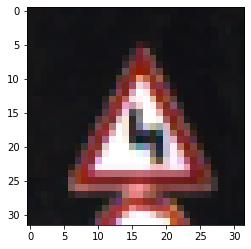

In [ ]:
plt.imshow(test['features'][80])